In [242]:
import pandas as pd
import joblib
import warnings
warnings.filterwarnings('ignore')

In [243]:
data = pd.read_csv('./Placement.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [244]:
data.shape

(215, 15)

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [246]:
data.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# EDA

In [247]:
data.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [248]:
# student placed
stat = data['status'].unique()
print(f" unique values : {stat}")
student_placed_count = data['status'].value_counts()
print(f"Student placement count : {student_placed_count}")

 unique values : ['Placed' 'Not Placed']
Student placement count : status
Placed        148
Not Placed     67
Name: count, dtype: int64


In [249]:
# top 5 student placed in SCI& Tec according to salary
 
data[(data['degree_t'] == 'Sci&Tech') & (data['status']=="Placed")].sort_values(by='salary', ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


# Data Preprocessing

In [250]:
data = data.drop(['salary', 'sl_no'], axis=1)
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed


In [251]:
ssc_b = data['ssc_b'].unique()
print(f"'ssc_b' => unique values : {ssc_b}")

hsc_b	= data['hsc_b'].unique()
print(f"'hsc_b' => unique values : {hsc_b	}")

hsc_s = data['hsc_s'].unique()
print(f"'hsc_s' => unique values : {hsc_s}")

degree_t = data['degree_t'].unique()
print(f"'degree_t' => unique values : {degree_t}")

workex = data['workex'].unique()
print(f"'workex' => unique values : {workex}")

specialisation = data['specialisation'].unique()
print(f" 'specialisation' => unique values : {specialisation}")

status = data['status'].unique()
print(f" 'status' => unique values : {status}")


'ssc_b' => unique values : ['Others' 'Central']
'hsc_b' => unique values : ['Others' 'Central']
'hsc_s' => unique values : ['Commerce' 'Science' 'Arts']
'degree_t' => unique values : ['Sci&Tech' 'Comm&Mgmt' 'Others']
'workex' => unique values : ['No' 'Yes']
 'specialisation' => unique values : ['Mkt&HR' 'Mkt&Fin']
 'status' => unique values : ['Placed' 'Not Placed']


# encode categroical value

In [252]:
	
data['hsc_b'] = data['hsc_b'].map({'Central' : 1, 'Others': 0})
data['ssc_b'] = data['ssc_b'].map({'Central' : 1, 'Others': 0})
data['hsc_s'] = data['hsc_s'].map({'Science': 2, 'Commerce' : 1, 'Arts': 0})
data['degree_t'] = data['degree_t'].map({'Sci&Tech': 2, 'Comm&Mgmt' : 1, 'Others': 0})
data['workex'] = data['workex'].map({'Yes' : 1, 'No': 0})
data['specialisation'] = data['specialisation'].map({'Mkt&HR' : 1, 'Mkt&Fin': 0})
data['status'] = data['status'].map({'Placed' : 1, 'Not Placed': 0})
data.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


In [253]:
X = data.drop(['status'], axis=1)
y = data['status']

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MOdel Training


In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [256]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'svm' : SVC(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier()
}

model_name = []
model_scores = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_test_pred)

    model_name.append(list(models.keys())[i])
    model_scores.append(round(score, 4)* 100)
    

    joblib.dump(model, f'restaurent_sentimental_analysis_{list(models)[i]}')
    
    print(list(models.keys())[i])
    print("-------------------------------------------------------------------------------")

    print(f'Score : {round(score, 4)* 100} ')
    
    print("===============================================================================")
    



LogisticRegression
-------------------------------------------------------------------------------
Score : 88.37 
svm
-------------------------------------------------------------------------------
Score : 76.74 
DecisionTreeClassifier
-------------------------------------------------------------------------------
Score : 83.72 
KNeighborsClassifier
-------------------------------------------------------------------------------
Score : 79.07 
RandomForestClassifier
-------------------------------------------------------------------------------
Score : 81.39999999999999 
Gradient Boost
-------------------------------------------------------------------------------
Score : 81.39999999999999 


In [257]:
print(model_scores)

[88.37, 76.74, 83.72, 79.07, 81.39999999999999, 81.39999999999999]


In [258]:
model_stat_df = pd.DataFrame({'Models' : model_name, 'Acc' : model_scores})
model_stat_df

,Models,Acc
0,LogisticRegression,88.37
1,svm,76.74
2,DecisionTreeClassifier,83.72
3,KNeighborsClassifier,79.07
4,RandomForestClassifier,81.40
5,Gradient Boost,81.40


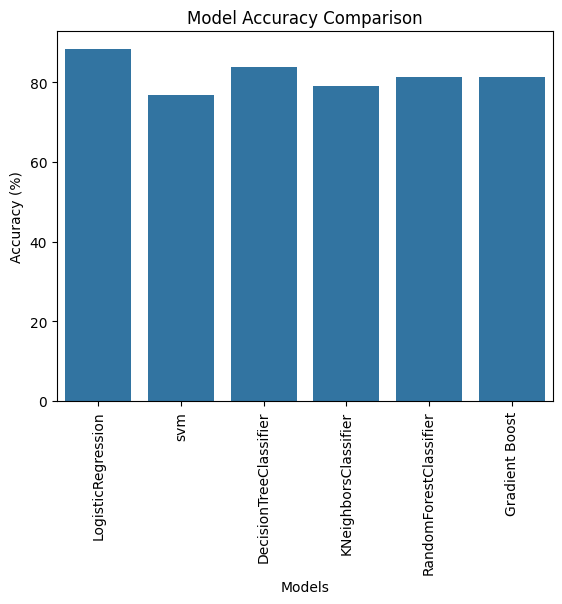

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Models', y='Acc', data=model_stat_df)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=90)
plt.show()


In [264]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [266]:
X.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.0,0,91.0,0,1,58.0,2,0,55.0,1,58.8


In [268]:
# predict with new data

new_data  = pd.DataFrame({
    'gender' : 0,
    'ssc_p' : 67.0,	
    'ssc_b' : 0,
    'hsc_p' : 91.0,	
    'hsc_b' : 0,	
    'hsc_s' : 1,	
    'degree_p' : 58.0,	
    'degree_t' : 2,	
    'workex' : 0,	
    'etest_p' : 55.0,	
    'specialisation' : 1,	
    'mba_p' : 55.8, 
}, index=[0])

In [271]:
lr_pred = lr.predict(new_data)
placement_probabiltiy = lr.predict_proba(new_data)

In [276]:
if lr_pred == 1:
    print("User will placed")
    print(f"Placement probabilty : {round(placement_probabiltiy[0][1] * 100, 2)}")
elif lr_pred == 0:
    print("User will not placed")
else:
    print("Somthing went wrong")

User will placed
Placement probabilty : 98.42
